___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
<center>*Copyright Pierian Data 2017*</center>
<center>*For more information, visit us at www.pieriandata.com*</center>

# Time Resampling

Let's learn how to sample time series data! This will be useful later on in the course!

In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Grab data
# Faster alternative
# df = pd.read_csv('time_data/walmart_stock.csv',index_col='Date')
df = pd.read_csv('time_data/walmart_stock.csv')

In [4]:
df.head()

Date       Open       High        Low      Close    Volume  Adj Close
0  2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
1  2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2  2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539
3  2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400  51.459220
4  2012-01-09  59.029999  59.549999  58.919998  59.180000   6679300  51.616215

Create a date index from the date column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null object
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [6]:
df['Date'] = df['Date'].apply(pd.to_datetime)

In [7]:
df.head()

Date       Open       High        Low      Close    Volume  Adj Close
0 2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
1 2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2 2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539
3 2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400  51.459220
4 2012-01-09  59.029999  59.549999  58.919998  59.180000   6679300  51.616215

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null datetime64[ns]
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [9]:
df.set_index('Date',inplace=True)

In [10]:
df.head()

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539
2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400  51.459220
2012-01-09  59.029999  59.549999  58.919998  59.180000   6679300  51.616215

## resample()

A common operation with time series data is resamplling based on the time series index. Let see how to use the resample() method.

#### All possible time series offest strings

<table border="1" class="docutils">
<colgroup>
<col width="13%" />
<col width="87%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Alias</th>
<th class="head">Description</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>B</td>
<td>business day frequency</td>
</tr>
<tr class="row-odd"><td>C</td>
<td>custom business day frequency (experimental)</td>
</tr>
<tr class="row-even"><td>D</td>
<td>calendar day frequency</td>
</tr>
<tr class="row-odd"><td>W</td>
<td>weekly frequency</td>
</tr>
<tr class="row-even"><td>M</td>
<td>month end frequency</td>
</tr>
<tr class="row-odd"><td>SM</td>
<td>semi-month end frequency (15th and end of month)</td>
</tr>
<tr class="row-even"><td>BM</td>
<td>business month end frequency</td>
</tr>
<tr class="row-odd"><td>CBM</td>
<td>custom business month end frequency</td>
</tr>
<tr class="row-even"><td>MS</td>
<td>month start frequency</td>
</tr>
<tr class="row-odd"><td>SMS</td>
<td>semi-month start frequency (1st and 15th)</td>
</tr>
<tr class="row-even"><td>BMS</td>
<td>business month start frequency</td>
</tr>
<tr class="row-odd"><td>CBMS</td>
<td>custom business month start frequency</td>
</tr>
<tr class="row-even"><td>Q</td>
<td>quarter end frequency</td>
</tr>
<tr class="row-odd"><td>BQ</td>
<td>business quarter endfrequency</td>
</tr>
<tr class="row-even"><td>QS</td>
<td>quarter start frequency</td>
</tr>
<tr class="row-odd"><td>BQS</td>
<td>business quarter start frequency</td>
</tr>
<tr class="row-even"><td>A</td>
<td>year end frequency</td>
</tr>
<tr class="row-odd"><td>BA</td>
<td>business year end frequency</td>
</tr>
<tr class="row-even"><td>AS</td>
<td>year start frequency</td>
</tr>
<tr class="row-odd"><td>BAS</td>
<td>business year start frequency</td>
</tr>
<tr class="row-even"><td>BH</td>
<td>business hour frequency</td>
</tr>
<tr class="row-odd"><td>H</td>
<td>hourly frequency</td>
</tr>
<tr class="row-even"><td>T, min</td>
<td>minutely frequency</td>
</tr>
<tr class="row-odd"><td>S</td>
<td>secondly frequency</td>
</tr>
<tr class="row-even"><td>L, ms</td>
<td>milliseconds</td>
</tr>
<tr class="row-odd"><td>U, us</td>
<td>microseconds</td>
</tr>
<tr class="row-even"><td>N</td>
<td>nanoseconds</td>
</tr>
</tbody>
</table>

In [11]:
# Our index
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

You need to call resample with the rule parameter, then you need to call some sort of aggregation function. This is because due to resampling, we need some sort of mathematical rule to join the rows by (mean,sum,count,etc...)

In [13]:
# Yearly Means
df.resample(rule='W').mean()

Open       High        Low      Close      Volume  Adj Close
Date                                                                         
2012-01-08  59.737499  60.120000  59.145000  59.615000  10774925.0  51.995617
2012-01-15  59.298000  59.680000  59.070000  59.332001   6983580.0  51.748788
2012-01-22  60.085000  60.530000  59.897500  60.369999   8506200.0  52.654120
2012-01-29  61.080000  61.510000  60.722000  61.090000   6827240.0  53.282098
2012-02-05  61.702001  62.084000  61.248000  61.762000   8693500.0  53.868209
2012-02-12  61.728000  61.994000  61.502001  61.810000   6155820.0  53.910075
2012-02-19  62.066000  62.304000  61.744000  62.058000   6126000.0  54.126378
2012-02-26  59.312501  59.562501  58.687499  59.000000  19332800.0  51.459220
2012-03-04  58.866001  59.181999  58.560000  58.860000  12127420.0  51.337114
2012-03-11  59.356001  59.764001  59.178001  59.616001   9542700.0  52.136424
2012-03-18  60.847999  61.172001  60.570000  60.966000   8303700.0  53.529857
2012-03-25  60.440001  60.816000  60.352000  60.660001   7226940.0  53.261181
2012-04-01  61.048000  61.334000  60.859999  61.100000   6864700.0  53.647513
2012-04-08  60.737500  61.045000  60.325001  60.735000   8756600.0  53.327033
2012-04-15  60.068000  60.286000  59.720000  59.954000   7638560.0  52.641293
2012-04-22  61.252000  61.910001  61.128000  61.742001   8171120.0  54.211207
2012-04-29  58.618000  59.382000  58.094000  58.530000  26046100.0  51.390981
2012-05-06  58.958000  59.192001  58.664000  58.936000   7716480.0  51.747460
2012-05-13  58.904000  59.446001  58.670000  59.175999   9060680.0  52.169867
2012-05-20  60.156000  60.798000  60.006000  60.343999  14704720.0  53.343261
2012-05-27  63.666000  64.484000  63.518001  64.346000  12077820.0  56.880974
2012-06-03  65.410002  66.062500  65.262499  65.622501  13020700.0  58.009384
2012-06-10  65.902000  66.462001  65.630000  66.302000  12924800.0  58.610052
2012-06-17  67.759999  67.986000  67.281999  67.539999  10592900.0  59.704426
2012-06-24  67.999998  68.416000  67.556000  67.890000   9138720.0  60.013821
2012-07-01  68.197999  68.794000  67.923999  68.674000  10136400.0  60.706867
2012-07-08  70.087502  70.845000  69.887503  70.635000  10067400.0  62.440364
2012-07-15  71.931999  72.528001  71.645999  72.324001  11019680.0  63.933417
2012-07-22  72.603999  73.017999  71.830000  72.542000  11536400.0  64.126125
2012-07-29  72.420000  73.087999  72.212001  72.851999   8033600.0  64.400160
...               ...        ...        ...        ...         ...        ...
2016-06-12  71.165999  71.462000  70.836000  71.117999   7220340.0  69.620598
2016-06-19  70.982001  71.345999  70.578000  70.970000   9951100.0  69.475715
2016-06-26  71.321999  72.142000  71.174001  71.673999   8873080.0  70.164891
2016-07-03  72.145999  72.498000  71.569998  72.259999   8646340.0  70.738553
2016-07-10  73.390001  73.845001  73.059999  73.582498   9682925.0  72.033207
2016-07-17  73.650000  73.966000  73.298001  73.663999   8088300.0  72.112991
2016-07-24  73.669999  73.964002  73.459999  73.672000   4849180.0  72.120824
2016-07-31  73.446001  73.658000  73.038002  73.402000   5333120.0  71.856509
2016-08-07  73.153999  73.709999  72.799998  73.382001   5861980.0  71.836931
2016-08-14  73.846001  74.276001  73.320000  73.703999   7468380.0  72.449212
2016-08-21  73.083998  73.950000  72.581999  73.250000  15189480.0  72.198592
2016-08-28  72.340001  72.646001  71.622000  71.852000  10061380.0  70.820659
2016-09-04  71.712000  72.222002  71.446001  71.898000   7879640.0  70.865998
2016-09-11  72.242500  72.490002  71.555000  71.797501  10255750.0  70.766941
2016-09-18  71.610001  72.345999  71.350002  72.038001   9316740.0  71.003989
2016-09-25  72.400000  72.654001  71.965999  72.173999   6615100.0  71.138036
2016-10-02  71.906000  72.262000  71.300000  71.718002   7291480.0  70.688584
2016-10-09  71.326001  71.626000  70.361999  70.698000  10331100.0  69.683222
2016-10-16  68.009999  68.436000  67.54

### Custom Resampling

You could technically also create your own custom resampling function:

In [23]:
def first_day(entry):
    """
    Returns the first instance of the period, regardless of samplling rate.
    """
    return entry[0]

In [25]:
df.resample(rule='A').apply(first_day)

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-12-31  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2013-12-31  68.930000  69.239998  68.449997  69.239998  10390800  61.879708
2014-12-31  78.720001  79.470001  78.500000  78.910004   6878000  72.254228
2015-12-31  86.269997  86.720001  85.550003  85.900002   4501800  80.624861
2016-12-31  60.500000  61.490002  60.360001  61.459999  11989200  59.289713

Text(0.5, 1.0, 'Yearly Mean Close Price for Walmart')

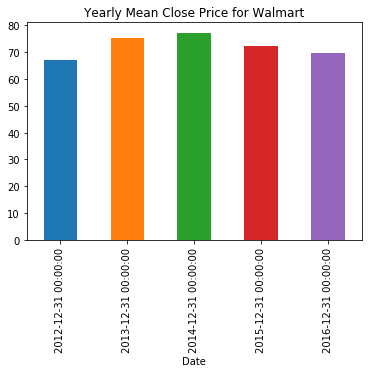

In [14]:
df['Close'].resample('A').mean().plot(kind='bar')
plt.title('Yearly Mean Close Price for Walmart')

Text(0.5, 1.0, 'Monthly Max Opening Price for Walmart')

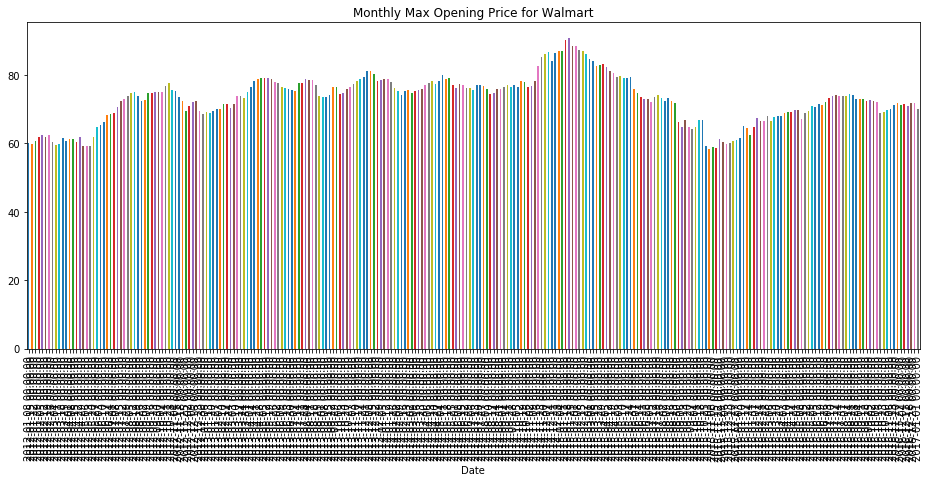

In [16]:
df['Open'].resample('W').max().plot(kind='bar',figsize=(16,6))
plt.title('Monthly Max Opening Price for Walmart')

That is it! Up next we'll learn about time shifts!